In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer #Reemplazo de datos faltantes
import numpy as np

datos = pd.read_csv('D:/lvs/Master/ProyectoTFM/datos/Post-Procesing/df_tablaGN_metGA.csv')

In [2]:
#Creamos conjuntos de datos
X = datos.iloc[:,1:-1].values
y = datos.iloc[:,-1].values

In [3]:
#Dividir concunto de entrenamiento y de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
from sklearn.ensemble import RandomForestRegressor
#Error cuadrado medio como criterio de division por defecto
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Error promedio: ' + str(np.mean(errors)))
    print('Precision: ' + str(accuracy))
    return accuracy

In [7]:
resultado = evaluate(regressor, X_test, y_test)

Error promedio: 6.055044333728255
Precision: 75.93125522870093


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
kf = KFold(n_splits=5)

y_pred = regressor.predict(X_test)

scores = cross_val_score(regressor, X_train, y_train, cv=kf, scoring='r2')
print("Validacion cruzada:")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

print('Metricas sobre la prediccion')
print('R^2:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:',sqrt(mean_squared_error(y_test, y_pred)))

Validacion cruzada:
Metricas cross_validation [0.54787669 0.52647324 0.49816851 0.43780027 0.48463698]
Media de cross_validation 0.49899114037006964
Metricas sobre la prediccion
R^2: 0.5563568018600986
MSE: 80.06936836434174
RMSE: 8.948148879200756


In [66]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = regressor.predict(X_test)
print ('Error cuadrático medio: ' + str(mean_squared_error(y_test, y_pred)))
print ('Estadístico R_2: ' + str(r2_score(y_test, y_pred)))

Error cuadrático medio: 77.82458969043299
Estadístico R_2: 0.5687945269271623


In [11]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [12]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.5min finished
C:\Python\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [13]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [14]:
regressor_mod = RandomForestRegressor(n_estimators = 1000, random_state = 0, min_samples_split = 5, min_samples_leaf= 2, 
                                     max_features = 'sqrt', max_depth = 100, bootstrap = False) 
regressor_mod.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=100,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [15]:
resultado = evaluate(regressor_mod, X_test, y_test)
y_pred_opt = regressor_mod.predict(X_test)
#score2 = regressor_mod.score(X_train,y_train)
#print("Metrica del modelo", score2)
#print ('Estadístico R_2: ' + str(r2_score(y_test, y_pred_opt)))
print('Metricas sobre la prediccion Modificada')
print('R^2:',r2_score(y_test, y_pred_opt))
print('MSE:',mean_squared_error(y_test, y_pred_opt))
print('RMSE:',sqrt(mean_squared_error(y_test, y_pred_opt)))

Error promedio: 5.77058759493486
Precision: 76.81420322774918
Metricas sobre la prediccion Modificada
R^2: 0.6223014577535191
MSE: 68.16758114765828
RMSE: 8.256366098209204


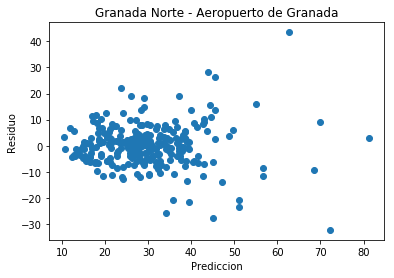

In [17]:
from matplotlib import pyplot as plt
plt.scatter(y_pred_opt, y_test - y_pred_opt)
plt.xlabel('Prediccion')
plt.ylabel('Residuo')
plt.title('Granada Norte - Aeropuerto de Granada')
plt.show()